# Notebook for data analysis of 'sensory' sessions [random/sensory photostim target groups] from dataframes (see ia_dataframe_basic.ipynb)

In [146]:
%run ./rob_setup_notebook.ipynb

import utils.utils_funcs as uf
import utils.gsheets_importer as gsi
import utils.ia_funcs as ia 
from utils.paq2py import *

# session_type = 'sensory_nodetrend'
# session_type = 'sensory_highactivity'
# session_type = 'sensory_topactivity'
# session_type = 'sensory_topcells'
# session_type = 'sensory_extremefilter'
# session_type = 'sensory_responsivecells'
session_type = 'sensory_2sec_test'

plot_colors = ['steelblue', 'darkorange', 'mediumseagreen']
plot_labels = ['Random', 'Sensory', 'Sham']

# plot_colors = ['sienna', 'mediumpurple', 'mediumseagreen']
# plot_labels = ['Not S2-projecting', 'S2-projecting', 'Sham']

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload

Suite2p path: ['/home/rlees/anaconda3/envs/suite2p/lib/python3.7/site-packages/suite2p']
QNAP_path: /home/rlees/mnt/qnap 
QNAP_data_path /home/rlees/mnt/qnap/Data 
Pickle folder: /home/rlees/mnt/qnap/pkl_files 
Master pickle: /home/rlees/mnt/qnap/master_pkl/master_obj.pkl 
Figure save path: /home/rlees/mnt/qnap/Analysis/Figures 
STA movie save path: /home/rlees/mnt/qnap/Analysis/STA_movies 
S2 borders path: /home/rlees/mnt/qnap/Analysis/S2_borders


# Define dataframe paths

In [4]:
session_df_path = qnap_path + '/pkl_files/dataframes/' + session_type + '_session_df.pkl'
experiment_df_path = qnap_path + '/pkl_files/dataframes/' + session_type + '_experiment_df.pkl'
trial_df_path = qnap_path + '/pkl_files/dataframes/' + session_type + '_trial_df.pkl'
cell_df_path = qnap_path + '/pkl_files/dataframes/' + session_type + '_cell_df.pkl'
cell_trial_df_path = qnap_path + '/pkl_files/dataframes/' + session_type + '_cell_trial_df.pkl'
cell_mean_timepoint_df_path = qnap_path + '/pkl_files/dataframes/' + session_type + '_cell_mean_timepoint_df.pkl'
cell_trial_single_timepoint_df_path = (qnap_path + '/pkl_files/dataframes/' + session_type + 
                                       '_cell_trial_single_timepoint_df.pkl')

# Load all dataframes

In [ ]:
session_df = pd.read_pickle(session_df_path)
trial_df = pd.read_pickle(trial_df_path)
experiment_df = pd.read_pickle(experiment_df_path)
cell_trial_df = pd.read_pickle(cell_trial_df_path)
cell_df = pd.read_pickle(cell_df_path)
cell_mean_timepoint_df = pd.read_pickle(cell_mean_timepoint_df_path)
cell_trial_single_timepoint_df = pd.read_pickle(cell_trial_single_timepoint_df_path)

In [ ]:
# remove_id = '2020-09-15_RL102'
# cell_df = cell_df.query('session_id != @remove_id')
# cell_mean_timepoint_df = cell_mean_timepoint_df.query('session_id != @remove_id')

# Mean trial traces (lineplot)

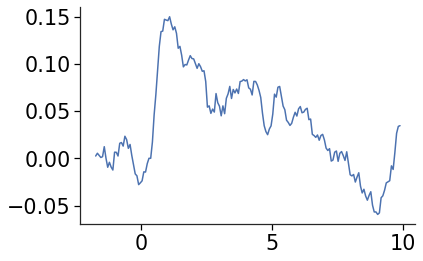

In [42]:
# single example of target cell activation

target = 'pr_target'

s1_targets = cell_df[cell_df[target] & cell_df['s1_cell']].index
df_filter = cell_mean_timepoint_df['cell_id'].isin(s1_targets)
filtered_df = cell_mean_timepoint_df[df_filter]

cell_ids = filtered_df.cell_id.unique()
target_example_df = filtered_df.query('cell_id == @cell_ids[2]')
rolling_mean = target_example_df.rolling(5).mean()['pr_sta_resp']

sns.lineplot(x=(target_example_df['frame'].to_numpy()*0.06565)-2, y=rolling_mean.to_numpy(), estimator='mean', ci=95);

N_numbers:
n = 8 animals
n = 642 cells for Not S2-projecting targets
n = 4633 cells for Not S2-projecting non targets
n = 667 cells for S2-projecting targets
n = 4633 cells for S2-projecting non targets
n = 642 cells for Sham targets
n = 4633 cells for Sham non targets


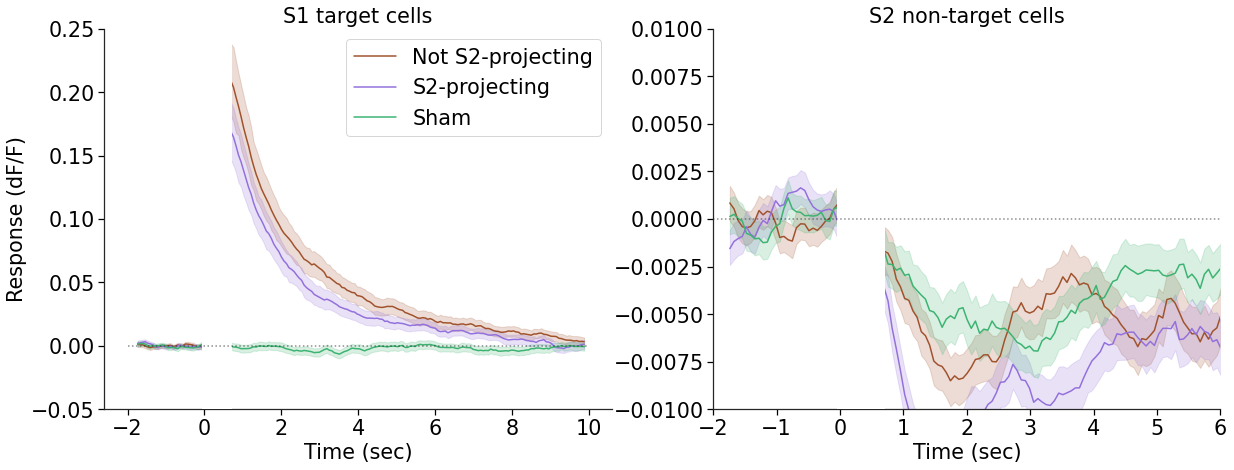

In [19]:
# GRAND AVERAGE OF ALL CELLS (POSITIVE AND NEGATIVE)

target_type = ['pr_target', 'ps_target', 'pr_target']
responses = ['pr_sta_resp', 'ps_sta_resp', 'spont_sta_resp']

fig, axes = plt.subplots(nrows=1, ncols=2, sharex=False, figsize=(20,7))

n_numbers = []

n_numbers.append(f'n = {len(cell_df["session_id"].unique())} animals')

for label, target, response, color in zip(plot_labels, target_type, responses, plot_colors):

    # filter dataframes using variables above
    s1_targets = cell_df[cell_df[target] & cell_df['s1_cell']].index
    nontargets = cell_df[~cell_df[target] & cell_df['s2_cell']].index
    
    # populate the plots with filtered data
    for col, cell_id_list in enumerate([s1_targets, nontargets]):
        df_filter = cell_mean_timepoint_df['cell_id'].isin(cell_id_list)
        filtered_df = cell_mean_timepoint_df[df_filter]
        rolling_mean = filtered_df.groupby('cell_id').rolling(5).mean()[response]
        
        ax = axes[col]
        sns.lineplot(x=(filtered_df['frame'].to_numpy()*0.06565)-2, y=rolling_mean.to_numpy(), 
                     estimator='mean', ci=95, ax=ax, label=label, legend=False, color=color)

        display(fig)
        clear_output(wait = True)
        
        target_text = ['targets', 'non targets']
        n_numbers.append(f'n = {len(cell_id_list.unique())} cells for {label} {target_text[col]}')
    
# construct patch to cover stim artifact period
for ax in axes:
    stim_patch = patches.Rectangle((-0.05,-100), 0.75, 999, zorder=3, color='white')
    ax.add_patch(stim_patch)

axes[0].set_title('S1 target cells')
axes[1].set_title('S2 non-target cells')

for ax in axes:
    ax.set_xlabel('Time (sec)')
    ax.set_ylabel('')

axes[0].set_ylabel('Response (dF/F)');
axes[0].legend(plot_labels, loc='upper right');

axes[0].hlines(0, -2, 10, linestyles='dotted', zorder=4, alpha=0.5, color='k');
axes[1].hlines(0, -2, 10, linestyles='dotted', zorder=4, alpha=0.5, color='k');

axes[0].set_ylim([-0.05, 0.25])
axes[1].set_ylim([-0.010, 0.010])
axes[1].set_xlim([-2, 6])

print('N_numbers:', *n_numbers, sep='\n')

save_path = os.path.join(qnap_path, session_type + '_DffTrace_GrandAverage_lineplot_col_TargetID_split_TrialType')
ia.savePlot(save_path)

N_numbers:
n = 8 animals
n = 391 cells for Not S2-projecting targets
n = 16 cells for Not S2-projecting non targets
n = 348 cells for S2-projecting targets
n = 117 cells for S2-projecting non targets
n = 4 cells for Sham targets
n = 2 cells for Sham non targets


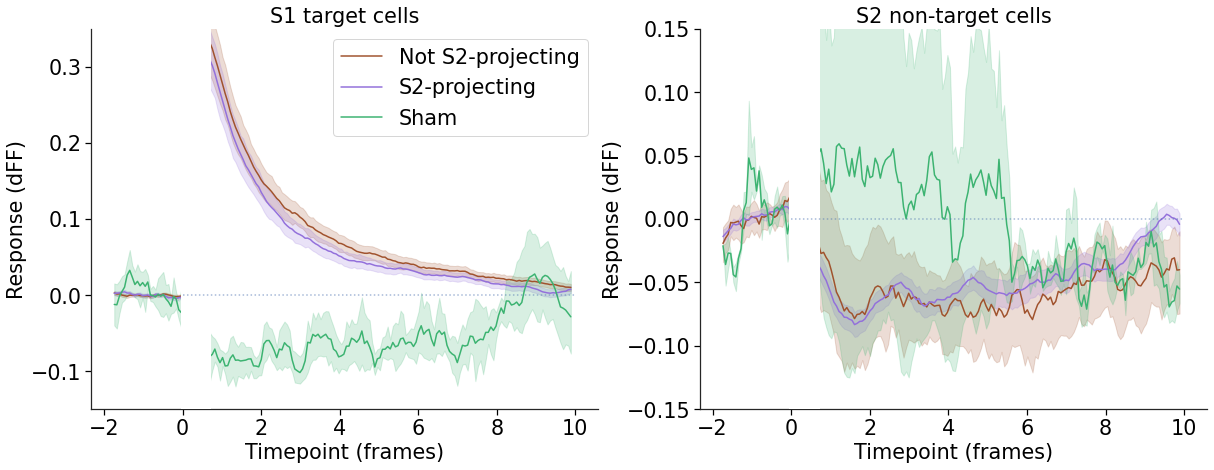

In [18]:
# GRAND AVERAGE FOR CELLS PASSING STATISTICAL TEST

test_type = 'fdr'
if test_type == 'fdr':
    stat_test = ['sta_sig_pr', 'sta_sig_ps', 'sta_sig_spont']
if test_type == 'nomulti':
    stat_test = ['sta_sig_nomulti_pr', 'sta_sig_nomulti_ps', 'sta_sig_nomulti_spont']
target_type = ['pr_target', 'ps_target', 'pr_target']
responses = ['pr_sta_resp', 'ps_sta_resp', 'spont_sta_resp']

fig, axes = plt.subplots(nrows=1, ncols=2, sharex=True, figsize=(20,7))

n_numbers = []

n_numbers.append(f'n = {len(cell_df["session_id"].unique())} animals')

for test, label, target, response, color in zip(stat_test, plot_labels, target_type, responses, plot_colors):

    # filter dataframes using variables above
    s1_targets = cell_df[cell_df[test] & cell_df[target] & cell_df['s1_cell']].index
    nontargets = cell_df[cell_df[test] & ~cell_df[target] & cell_df['s2_cell']].index
    
    # populate the plots with filtered data
    for col, cell_id_list in enumerate([s1_targets, nontargets]):
        df_filter = cell_mean_timepoint_df['cell_id'].isin(cell_id_list)
        filtered_df = cell_mean_timepoint_df[df_filter]
        rolling_mean = filtered_df.groupby('cell_id').rolling(5).mean()[response]

        ax = axes[col]
        sns.lineplot(x=(filtered_df['frame'].to_numpy()*0.06565)-2, y=rolling_mean.to_numpy(), estimator='mean', 
                     ci=95, data=filtered_df, ax=ax, label=label, legend=False, color=color)

        display(fig)
        clear_output(wait = True)
        
        n_numbers.append(f'n = {len(cell_id_list.unique())} cells for {label} {target_text[col]}')

sign = ['positive-responder', 'negative-responder']
photostim_id = ['s1 target', 
#                 's1 non-target', 
                's2 non-target']

axes[0].set_title('S1 target cells')
axes[1].set_title('S2 non-target cells')

# construct patch to cover stim artifact period
for ax in axes:
    stim_patch = patches.Rectangle((-0.05,-100), 0.75, 999, zorder=3, color='white')
    ax.add_patch(stim_patch)
    
for col_i, col in enumerate(axes):
    col.set_xlabel('Timepoint (frames)')
    col.set_ylabel('Response (dFF)')
    
    col.set_ylim([-0.15, 0.15])

    if col_i == 0: 
        col.legend()
        col.set_ylim([-0.15, 0.35])
        
    col.hlines(0, 0, 10, linestyles='dotted', zorder=4, alpha=0.5);
    
save_path = os.path.join(qnap_path, session_type + '_DffTrace_GrandAverage_lineplot_col_TargetID_split_TrialType_FDR')
ia.savePlot(save_path)

print('N_numbers:', *n_numbers, sep='\n')

In [ ]:
# TRACE AVERAGE PER ANIMAL OF ONLY S2 NON-TARGET

# list of column names to be used to filter the dataframe
target_type = ['pr_target', 'ps_target', 'pr_target']
responses = ['pr_sta_resp', 'ps_sta_resp', 'spont_sta_resp']

n_numbers = []

for target, response, color, label in zip(target_type, responses, plot_colors, plot_labels):

    fig, axes = plt.subplots(nrows=1, ncols=1, sharey=True, sharex=True, figsize=(10,5))
    
    # filter dataframes using variables above
    s2_nontargets_pos = cell_df[~cell_df[target] & cell_df['s2_cell']].index
    
    df_filter = cell_mean_timepoint_df['cell_id'].isin(s2_nontargets_pos)
    filtered_df = cell_mean_timepoint_df[df_filter]
    
    for session_id in filtered_df.session_id.unique():
        session_df = filtered_df[filtered_df.session_id == session_id]
        rolling_mean = session_df.groupby('cell_id').rolling(5).mean()[response]
    
        sns.lineplot(x='timepoint', y=rolling_mean.to_numpy(), estimator='mean', ci=95, data=session_df, 
                     ax=axes, color=color)

    axes.set_xlabel('Time (sec)')
    axes.set_ylabel('Response (dF/F)')
    axes.set_title(label)
    axes.hlines(0, -3, 11, linestyles='dotted', zorder=4, alpha=0.5, lw=3);
    axes.set_ylim([-0.03, 0.03])
    axes.set_xlim([-2,6])
    
    # construct patch to cover stim artifact period
    stim_patch = patches.Rectangle((-0.1,-100), 0.75, 999, zorder=3, color='white')
    axes.add_patch(stim_patch)
    
    save_path = os.path.join(qnap_path, session_type + '_DffTrace_' + label + '_CellMean_PerAnimal')
    ia.savePlot(save_path)
    
    target_text = ['targets', 'non targets']
    n_numbers.append(f'n = {len(s2_nontargets_pos.unique())} cells for {label} non-targets')

n_numbers.append(f'n = {len(cell_df["session_id"].unique())} animals')

print('N_numbers:', *n_numbers, sep='\n')

# Number of responding cells (swarmplot)

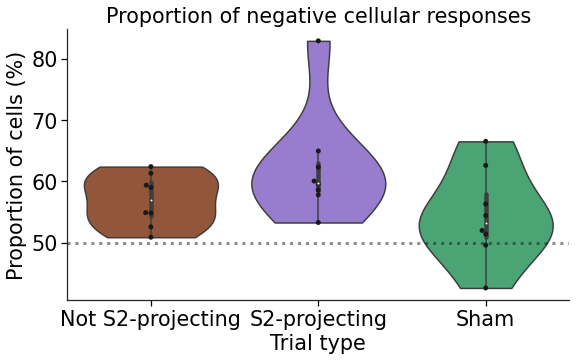

In [35]:
# list of column names to be used to filter the dataframe
target_type = ['pr_target', 'ps_target', 'pr_target']
sign_bool = ['pr_resp_sign', 'ps_resp_sign', 'spont_resp_sign']

s2_nontargets_neg_df = pd.DataFrame()

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(9,5))

for stim_id, label in enumerate(plot_labels):
        
    # define column names
    target = target_type[stim_id]
    sign = sign_bool[stim_id]
    
    s2_nontargets_neg = cell_df[~cell_df[target] & cell_df['s2_cell'] & 
                                ~cell_df[sign]].groupby('session_id').count()/cell_df[cell_df['s2_cell']].groupby('session_id').count()*100
    s2_nontargets_neg_df = pd.concat([s2_nontargets_neg_df, pd.DataFrame({label : s2_nontargets_neg['cell_num']})])

sns.swarmplot(data=s2_nontargets_neg_df, color='k',edgecolor='k')
sns.violinplot(data=s2_nontargets_neg_df, cut=0, scale='width', palette=sns.color_palette(plot_colors))
plt.hlines(50, -0.5, 2.5, linestyles='dotted', zorder=4, alpha=0.5, color='k', lw=3);
plt.xlabel('Trial type')
plt.ylabel('Proportion of cells (%)')
plt.title('Proportion of negative cellular responses');

# save the figure
save_path = os.path.join(qnap_path, session_type + '_ProportionCells_NegativeResponse_split_TrialType_boxswarmplot')
ia.savePlot(save_path)

# Number of targets/non-targets responding on each trial

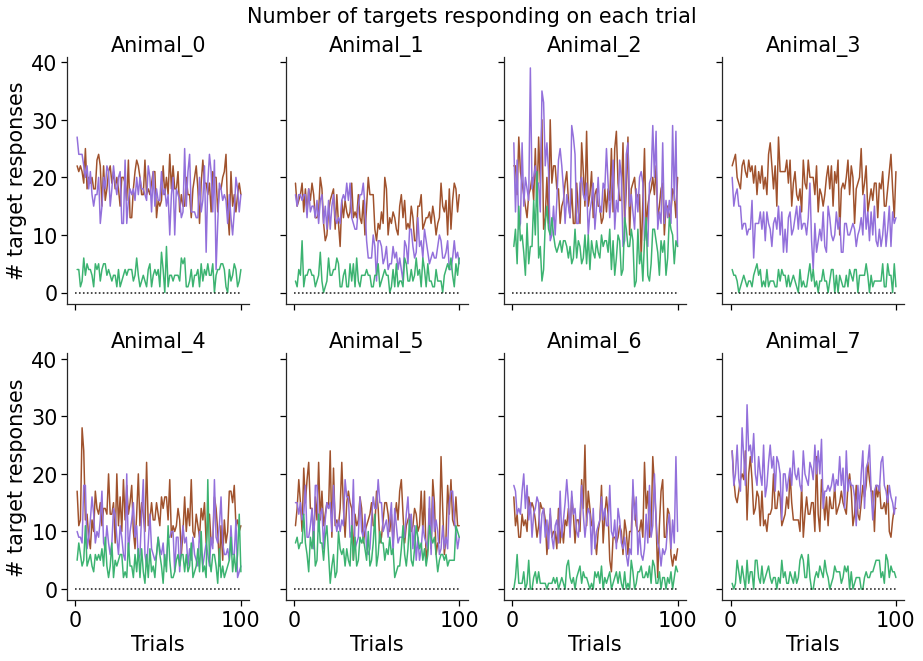

In [117]:
trials = ['pr', 'ps', 'spont']
targets = ['pr', 'ps', 'pr']

session_ids = cell_trial_df['session_id'].unique()   

fig, axes = plt.subplots(nrows=2, ncols=4, sharey=True, sharex=True, figsize=(15,10))
# fig, axes = plt.subplots(nrows=2, ncols=3, sharey=True, sharex=True, figsize=(15,10))

for color, trial, target, label in zip(plot_colors, trials, targets, plot_labels):
    
    target_cell_ids = cell_df.query(target + '_target & ' + trial + '_resp_sign').index

    target_filter = cell_trial_df['cell_id'].isin(target_cell_ids)
    
    filtered_df = cell_trial_df[target_filter] \
                   .groupby(['session_id', 'trial_num'])['trial_sig_dff_' + trial] \
                   .sum() \
                   .reset_index(drop=False) \
    
    for ax_i, ax in enumerate(axes.flatten()):
        
        try:
            session_df = filtered_df[filtered_df['session_id']==session_ids[ax_i]]
        except:
            break
        
        sns.lineplot(x='trial_num', y='trial_sig_dff_'+trial, data=session_df, ci=None, ax=ax, 
                     label=label, legend=False, color=color)
#         ax.set_title(session_ids[ax_i])
        ax.set_title('Animal_' + str(ax_i))
        
        if ax_i>3: ax.set_xlabel('Trials')
        ax.set_ylabel('# target responses')
            
        ax.hlines(0, 0, 100, linestyles='dotted', zorder=4, alpha=0.5, color='k');
                    
plt.suptitle('Number of targets responding on each trial', y=0.95, fontsize='xx-large');

# save the figure
save_path = os.path.join(qnap_path, session_type + '_NumTargetsResponding_PerTrial_SplitAnimals')
ia.savePlot(save_path)

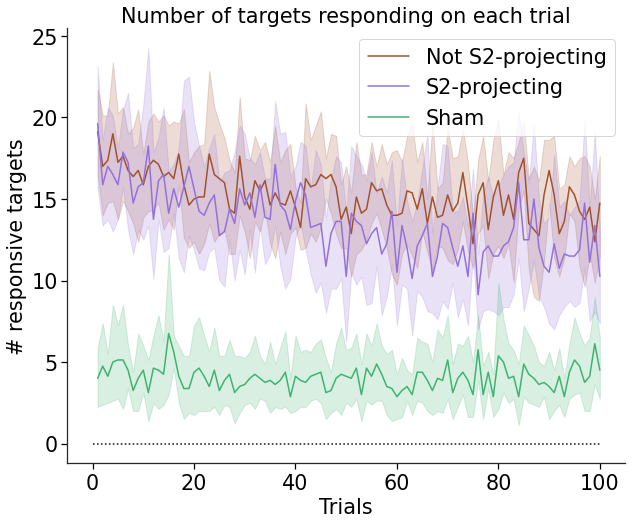

In [41]:
trials = ['pr', 'ps', 'spont']
targets = ['pr', 'ps', 'pr']

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,8))

for color, trial, target, label in zip(plot_colors, trials, targets, plot_labels):
    
    target_cell_ids = cell_df.query(target + '_target & ' + trial + '_resp_sign').index

    target_filter = cell_trial_df['cell_id'].isin(target_cell_ids)
    
    filtered_df = cell_trial_df[target_filter] \
                   .groupby(['session_id', 'trial_num'])['trial_sig_dff_' + trial] \
                   .sum() \
                   .reset_index(drop=False) \

    sns.lineplot(x='trial_num', y='trial_sig_dff_'+trial, data=filtered_df, ci=95, estimator='mean', ax=ax, 
                 label=label, legend=False, color=color)

    ax.legend(plot_labels)
    ax.set_xlabel('Trials')
    ax.set_ylabel('# target responses')

    ax.hlines(0, 0, 100, linestyles='dotted', zorder=4, alpha=0.5, color='k');
                    
    ax.set_title('Number of targets responding on each trial', y=1, fontsize='xx-large');

# save the figure
save_path = os.path.join(qnap_path, session_type + '_NumTargetsResponding_PerTrial_Mean')
ia.savePlot(save_path)

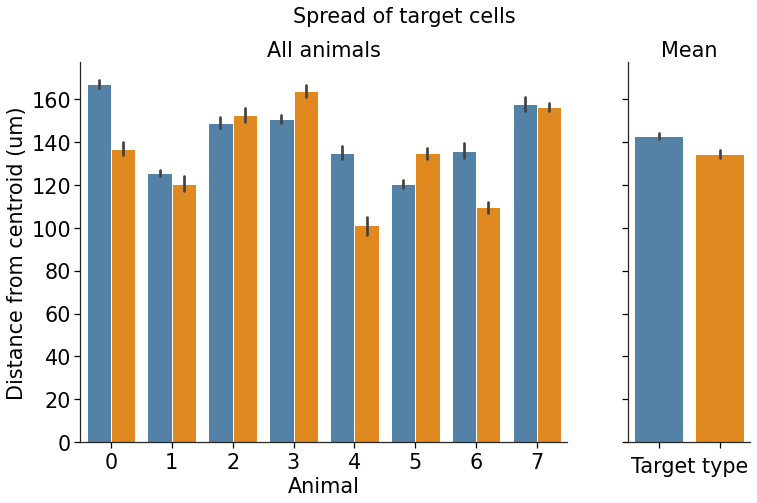

In [161]:
trials = ['pr', 'ps']

df = trial_df[trial_df.stim_type.isin(trials)]
unique_animals = len(df.session_id.unique())

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,7), sharey=True, gridspec_kw={'width_ratios':(4,1)})

sns.barplot(data=df, y='trial_target_euclid_dist', x='session_id', hue='stim_type', 
            ax=axes[0], palette=sns.color_palette(plot_colors))
sns.barplot(data=df, y='trial_target_euclid_dist', x='stim_type', 
            ax=axes[1], palette=sns.color_palette(plot_colors))

axes[0].set_ylabel('Distance from centroid (um)')
axes[1].set_ylabel('')

axes[0].set_xlabel('Animal')
axes[1].set_xlabel('Target type')
    
plt.suptitle('Spread of target cells', fontsize='xx-large', y=0.99)
axes[0].set_title('All animals')
axes[1].set_title('Mean');

axes[0].legend().set_visible(False)

ax0_labels = [item.get_text() for item in axes[0].get_xticklabels()]
ax0_labels = list(range(0,unique_animals))

axes[0].set_xticklabels(ax0_labels)

ax1_labels = [item.get_text() for item in axes[1].get_xticklabels()]
ax1_labels = ['','']

axes[1].set_xticklabels(ax1_labels)

# plt.subplots_adjust(wspace=1)

# save the figure
save_path = os.path.join(qnap_path, session_type + '_SpreadTargetCells')
ia.savePlot(save_path)

Loading pickle: /home/rlees/mnt/qnap/pkl_files/sensory_nodetrend/2020-10-02_RL108.pkl
Loading pickle: /home/rlees/mnt/qnap/pkl_files/sensory_nodetrend/2020-09-09_RL100.pkl
Loading pickle: /home/rlees/mnt/qnap/pkl_files/sensory_nodetrend/2020-09-16_RL103.pkl
Loading pickle: /home/rlees/mnt/qnap/pkl_files/sensory_nodetrend/2020-10-12_RL109.pkl
Loading pickle: /home/rlees/mnt/qnap/pkl_files/sensory_nodetrend/2020-09-04_RL093.pkl
Loading pickle: /home/rlees/mnt/qnap/pkl_files/sensory_nodetrend/2020-09-14_RL101.pkl
Loading pickle: /home/rlees/mnt/qnap/pkl_files/sensory_nodetrend/2020-09-15_RL102.pkl
Loading pickle: /home/rlees/mnt/qnap/pkl_files/sensory_nodetrend/2020-09-08_RL099.pkl
[95.13584505263366, 131.23096065839923, 112.52164212216317, 176.5084482135241, 47.83491331013802, 82.07903784011759, 28.619965680359698, 42.19820908725848]


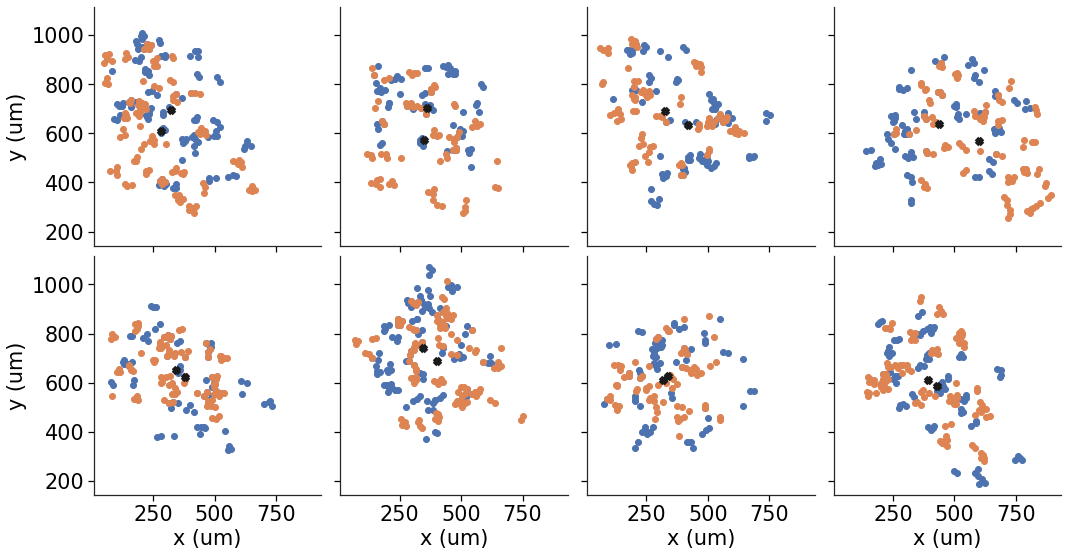

In [80]:
# plot difference between target cloud centroids

stim_types = ['pr', 'ps']
pkl_files = ia.listdirFullpath(os.path.join(pkl_folder, session_type), string='.pkl')

dist = []

# fig, centroid_ax = plt.subplots(nrows=1, ncols=1)

fig, axes = plt.subplots(nrows=2, ncols=4, sharex=True, sharey=True, figsize=(15, 10))

cloud_axes = axes.flatten()

for i, pkl in enumerate(pkl_files):
    
    ses_obj = ia.loadPickle(pkl)
    
    exp_list = ia.makeExpList(ses_obj, stim_types)
    
    coords = []
    
    for exp_obj in exp_list:
        
        cell_meds = np.array(exp_obj.cell_med[0])*exp_obj.pix_sz_x
        target_cell_meds = cell_meds[exp_obj.targeted_cells]
        
        x = target_cell_meds[:,1].mean()
        y = target_cell_meds[:,0].mean()
        
        cloud_axes[i].scatter(target_cell_meds[:,1], target_cell_meds[:,0],zorder=-1)
#         centroid_ax.scatter(x, y, color='C'+str(i))
        cloud_axes[i].scatter(x, y, marker='x', linewidth=5, color='k')
    
        coords.append([x,y])
    
    dist_x = coords[0][0] - coords[1][0]
    dist_y = coords[0][1] - coords[1][1]
    
    dist.append(np.sqrt(dist_x**2 + dist_y**2))
    
for row, row_ax in enumerate(axes):
    for col, col_ax in enumerate(row_ax):
        if col == 0: col_ax.set_ylabel('y (um)')
        if row == 1: col_ax.set_xlabel('x (um)')
        col_ax.set_aspect('equal')

fig.tight_layout(h_pad=-10)

print(dist)

save_path = os.path.join(qnap_path, session_type + '_targeted_cells_centroid_distance')
ia.savePlot(save_path)

## Targeting of sensory responsive cells

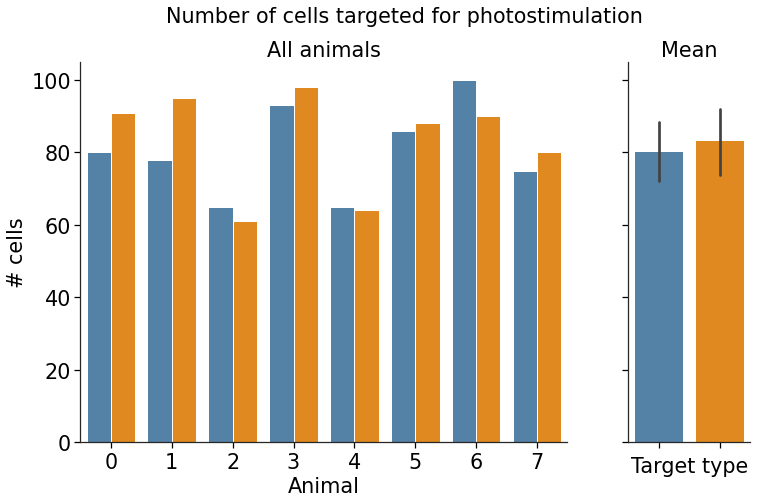

In [163]:
df = pd.DataFrame()

unique_animals = len(trial_df.session_id.unique())

targets = ['pr_target', 'ps_target']

for target in targets:
    target_df = cell_df.query(target)
    
    num_targets = target_df.groupby('session_id')[target].count()

    session_labels = [session_id[-5:] for session_id in target_df['session_id'].unique()]

    temp_df = pd.DataFrame({'target_type' : np.repeat(target, len(num_targets)),
                            'num_targets' : num_targets,
                            'session_id' : session_labels
                           })
    
    df = pd.concat([df, temp_df])
    
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,7), sharey=True, gridspec_kw={'width_ratios':(4, 1)})

sns.barplot(data=df, x='session_id', y='num_targets', hue='target_type', 
            ax=axes[0], palette=sns.color_palette(plot_colors));
sns.barplot(data=df, y='num_targets', x='target_type', 
            ax=axes[1], palette=sns.color_palette(plot_colors));

for ax in axes:
    ax.set_ylabel('# cells');
    
axes[0].set_xlabel('Animal')
axes[1].set_xlabel('Target type')

axes[0].set_title('All animals')
axes[1].set_title('Mean')

axes[0].legend().set_visible(False)
axes[1].set_ylabel('')

ax0_labels = [item.get_text() for item in axes[0].get_xticklabels()]
ax0_labels = list(range(0,unique_animals))

axes[0].set_xticklabels(ax0_labels)

ax1_labels = [item.get_text() for item in axes[1].get_xticklabels()]
ax1_labels = ['','']

axes[1].set_xticklabels(ax1_labels)

plt.suptitle('Number of cells targeted for photostimulation', fontsize='xx-large', y=0.99);

# save the figure
save_path = os.path.join(qnap_path, session_type + 
                         '_Num_TargetedCells')
ia.savePlot(save_path)

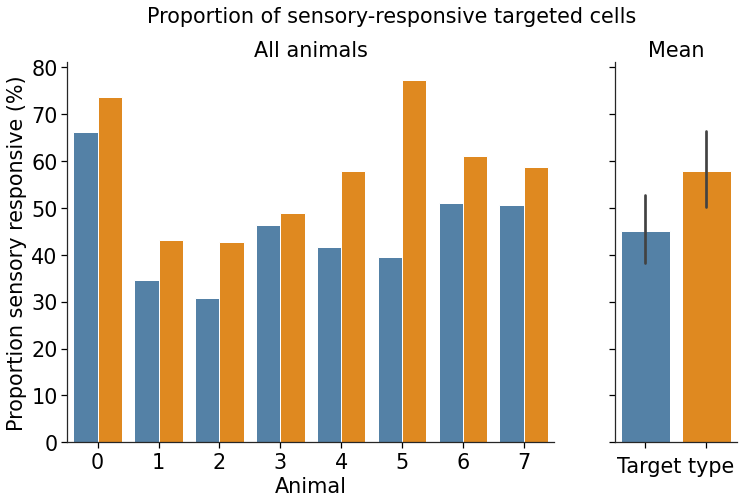

In [164]:
df = pd.DataFrame()

unique_animals = len(trial_df.session_id.unique())

targets = ['pr_target', 'ps_target']

for target in targets:
    target_df = cell_df.query(target)
    sr_target_df = cell_df.query(target + ' & sta_sig_whisker')

    num_sr_targets = sr_target_df.groupby('session_id')[target].count()
    num_targets = target_df.groupby('session_id')[target].count()

    percent_targets_sr = num_sr_targets/num_targets * 100
    session_labels = [session_id[-5:] for session_id in target_df['session_id'].unique()]

    temp_df = pd.DataFrame({'target_type' : np.repeat(target, len(percent_targets_sr)),
                            'percent_sr' : percent_targets_sr,
                            'session_id' : session_labels
                           })
    
    df = pd.concat([df, temp_df])
    
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,7), sharey=True, gridspec_kw={'width_ratios':(4, 1)})

sns.barplot(data=df, x='session_id', y='percent_sr', hue='target_type', 
            ax=axes[0], palette=sns.color_palette(plot_colors));
sns.barplot(data=df, y='percent_sr', x='target_type', 
            ax=axes[1], palette=sns.color_palette(plot_colors));

for ax in axes:
    ax.set_ylabel('Proportion sensory responsive (%)');
    
axes[0].set_xlabel('Animal')
axes[1].set_xlabel('Target type')

axes[0].set_title('All animals')
axes[1].set_title('Mean')

axes[0].legend().set_visible(False)
axes[1].set_ylabel('')

ax0_labels = [item.get_text() for item in axes[0].get_xticklabels()]
ax0_labels = list(range(0,unique_animals))

axes[0].set_xticklabels(ax0_labels)

ax1_labels = [item.get_text() for item in axes[1].get_xticklabels()]
ax1_labels = ['','']

axes[1].set_xticklabels(ax1_labels)
    
plt.suptitle('Proportion of sensory-responsive targeted cells', fontsize='xx-large', y=0.99);

# save the figure
save_path = os.path.join(qnap_path, session_type + 
                         '_Pct_TargetCells_SensoryResponsive')
ia.savePlot(save_path)

## Target responses to each trial type

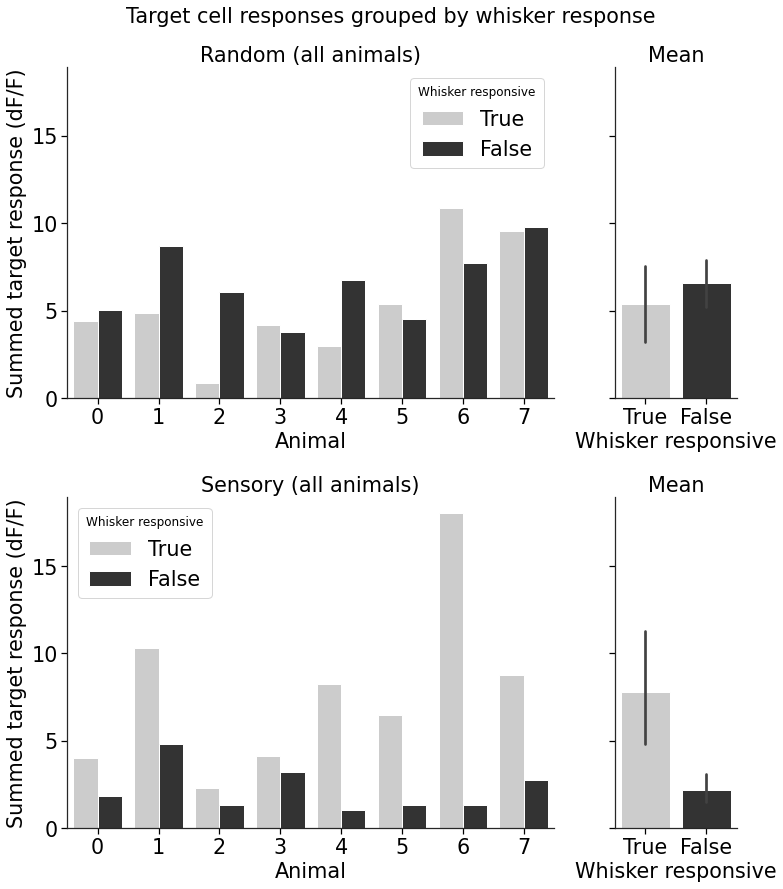

In [185]:
targets = ['pr_target', 'ps_target']
trials = ['pr', 'ps']

unique_animals = len(trial_df.session_id.unique())

fig, axes = plt.subplots(nrows=2, ncols=2, sharey=True, figsize=(12,14), gridspec_kw={'width_ratios':(4, 1)})

for i, (target, trial, label, ax) in enumerate(zip(targets, trials, plot_labels, axes)):
    
    session_labels = []
    
    target_df = cell_df.query(target)
    
    ctb_positive_targets = target_df.query('sta_sig_whisker')
    sum_resp_ctb_positive = ctb_positive_targets.groupby('session_id').sum()[trial + '_sta_amp_resp']
    session_labels.extend(ctb_positive_targets.groupby('session_id').sum().index.to_numpy())
    
    ctb_negative_targets = target_df.query('~sta_sig_whisker')
    sum_resp_ctb_negative = ctb_negative_targets.groupby('session_id').sum()[trial + '_sta_amp_resp']
    session_labels.extend(ctb_negative_targets.groupby('session_id').sum().index.to_numpy())
    
#     ctb_positive_filter = cell_mean_timepoint_df.cell_id.isin(ctb_positive_targets)
#     ctb_positive_df = cell_mean_timepoint_df[ctb_positive_filter]
    
#     ctb_negative_filter = cell_mean_timepoint_df.cell_id.isin(ctb_negative_targets)
#     ctb_negative_df = cell_mean_timepoint_df[ctb_negative_filter]
    
    df = pd.DataFrame({'summed_resp' : np.hstack([sum_resp_ctb_positive, sum_resp_ctb_negative]),
                       'Whisker responsive' : np.hstack([np.repeat('True', len(sum_resp_ctb_positive)),
                                              np.repeat('False', len(sum_resp_ctb_negative))
                                            ]),
                       'session_id' : [session_label[-5:] for session_label in session_labels]
                      })
    
    sns.barplot(data=df, x='session_id', y='summed_resp', hue='Whisker responsive', 
                palette=sns.color_palette(['0.8', '0.2']), ax=ax[0])
    sns.barplot(data=df, y='summed_resp', x='Whisker responsive', 
                palette=sns.color_palette(['0.8', '0.2']), ax=ax[1])
    ax[0].set_title(label + ' (all animals)')
    ax[0].set_ylabel('Summed target response (dF/F)')
    ax[0].set_xlabel('Animal')
    
    ax[1].set_ylabel('')
    ax[1].set_title('Mean')
    
    ax0_labels = [item.get_text() for item in ax[0].get_xticklabels()]
    ax0_labels = list(range(0,unique_animals))

    ax[0].set_xticklabels(ax0_labels)

#     ax1_labels = [item.get_text() for item in ax[1].get_xticklabels()]
#     ax1_labels = ['','']

#     ax[1].set_xticklabels(ax1_labels)
        
plt.suptitle('Target cell responses grouped by whisker response', fontsize='xx-large', y=0.94);
plt.subplots_adjust(hspace=0.3)

# save the figure
save_path = os.path.join(qnap_path, session_type + 
                         '_ResponseAmplitude_TargetCells_SensoryResponsiveness')
ia.savePlot(save_path)

# Mean activity of targets/non-targets responding on each trial

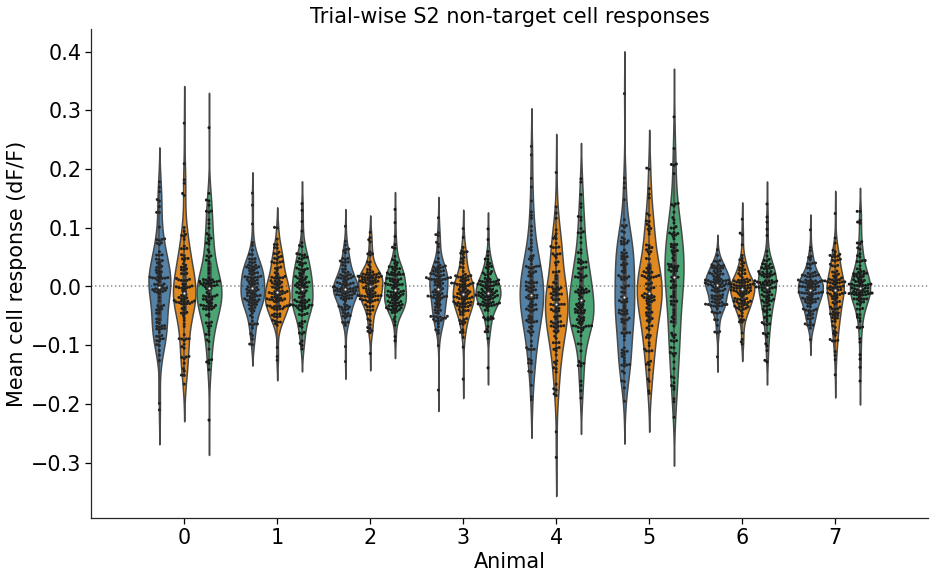

In [183]:
target_types = ['pr', 'ps', 'pr']
trial_types = ['pr', 'ps', 'spont']

unique_animals = len(trial_df.session_id.unique())

df = pd.DataFrame()

for target, trial in zip(target_types, trial_types):

    s2_nontarget_cell_ids = cell_df.query('~' + target + '_target & s2_cell').index
    
    cell_id_list = [s2_nontarget_cell_ids]
    
    for i, cell_ids in enumerate(cell_id_list):
        
        cell_filter = cell_trial_df['cell_id'].isin(cell_ids)
        filtered_df = cell_trial_df[cell_filter]
        
        mean_df = filtered_df.groupby(['session_id', 'trial_num']).mean().reset_index(drop=False)
        temp_df = pd.DataFrame({'session_id' : mean_df['session_id'],
                                'trial_num' : mean_df['trial_num'],
                                'trial_type' : np.repeat(trial, len(mean_df)),
                                'mean_activity' : mean_df[trial + '_amp_resp']
                               })
        df = pd.concat([df, temp_df])
        
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(15,9))

session_ids = cell_df['session_id'].unique()
animal_ids = [session_id.split('_')[-1] for session_id in session_ids]

sns.swarmplot(x='session_id', y='mean_activity', hue='trial_type', size=3, dodge=True, data=df, 
              ax=axes, color='k')
sns.violinplot(x='session_id', y='mean_activity', hue='trial_type', size=3, dodge=True, data=df, 
               ax=axes, palette=sns.color_palette(plot_colors))

axes.set_xticklabels(animal_ids)
axes.set_ylabel('Mean cell response (dF/F)')
axes.set_title('Trial-wise S2 non-target cell responses')
axes.legend().set_visible(False)

ax0_labels = [item.get_text() for item in axes.get_xticklabels()]
ax0_labels = list(range(0,unique_animals))

axes.set_xticklabels(ax0_labels)
axes.set_xlabel('Animal')

axes.hlines(0, -1, 17, linestyles='dotted', zorder=4, alpha=0.5, color='k');
axes.set_xlim([-1, unique_animals]);

# save the figure
save_path = os.path.join(qnap_path, session_type + 
                         '_MeanActivity_S2Cells_SplitAnimal_Trials')
ia.savePlot(save_path)

# Input vs output activity in all trials, any cell, not just responding (scatterplot)

/home/rlees/anaconda3/envs/suite2p/lib/python3.7/site-packages/scipy/stats/stats.py:2500: RuntimeWarning: invalid value encountered in true_divide
  return (a - mns) / sstd
/home/rlees/anaconda3/envs/suite2p/lib/python3.7/site-packages/scipy/stats/stats.py:2500: RuntimeWarning: invalid value encountered in true_divide
  return (a - mns) / sstd


trial: Random slope 0.2246352733655287 r_value 0.22463526937021916 p_value 1.3099595513549408e-10


/home/rlees/anaconda3/envs/suite2p/lib/python3.7/site-packages/scipy/stats/stats.py:2500: RuntimeWarning: invalid value encountered in true_divide
  return (a - mns) / sstd
/home/rlees/anaconda3/envs/suite2p/lib/python3.7/site-packages/scipy/stats/stats.py:2500: RuntimeWarning: invalid value encountered in true_divide
  return (a - mns) / sstd


trial: Sensory slope 0.2965927304800209 r_value 0.29659273578520245 p_value 1.0407530703013309e-17


/home/rlees/anaconda3/envs/suite2p/lib/python3.7/site-packages/scipy/stats/stats.py:2500: RuntimeWarning: invalid value encountered in true_divide
  return (a - mns) / sstd
/home/rlees/anaconda3/envs/suite2p/lib/python3.7/site-packages/scipy/stats/stats.py:2500: RuntimeWarning: invalid value encountered in true_divide
  return (a - mns) / sstd


trial: Sham slope 0.3000001694338293 r_value 0.30000017164091375 p_value 4.225236742266084e-18


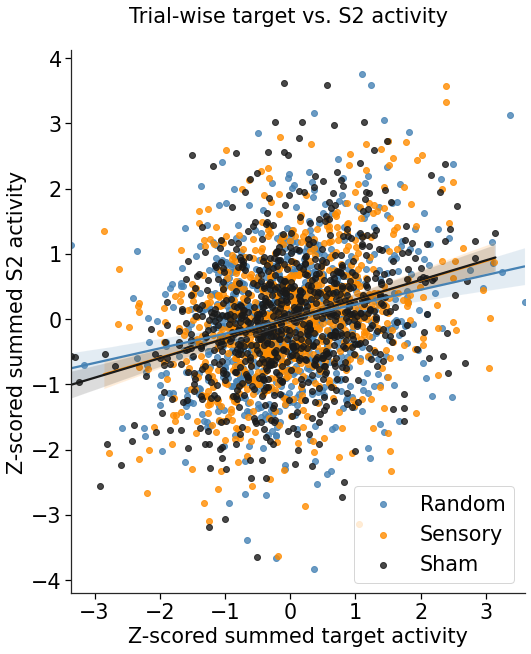

In [201]:
# Z SCORING

responses = ['pr_amp_resp', 'ps_amp_resp', 'spont_amp_resp']
targets = ['pr_target', 'ps_target', 'pr_target']
trials = ['random', 'sensory', 'sham']
colors = plot_colors[:2]
colors.append('k')

# create and populate the plots using filtered data
fig, axes = plt.subplots(nrows=1, ncols=1, sharex=True, figsize=(10,10))

for response, target, label, color in zip(responses, targets, plot_labels, colors):
    
    s2_cell_ids = cell_df.query('s2_cell & ~' + target).index
    target_cell_ids = cell_df.query(target).index

    target_filter = cell_trial_df['cell_id'].isin(target_cell_ids)
    target_df = cell_trial_df[target_filter].dropna(axis=0, subset=[response])
    target_amp_resp = target_df.groupby(['trial_num','session_id']).sum()
    target_amp_resp = target_amp_resp.groupby('session_id').transform(lambda x : stats.zscore(x, ddof=1))[response]

    s2_filter = cell_trial_df['cell_id'].isin(s2_cell_ids)
    s2_df = cell_trial_df[s2_filter].dropna(axis=0, subset=[response])
    s2_amp_resp = s2_df.groupby(['trial_num','session_id']).sum()
    s2_amp_resp = s2_amp_resp.groupby('session_id').transform(lambda x : stats.zscore(x, ddof=1))[response]

    df = pd.DataFrame({'target_amp_resp' : target_amp_resp,
                       's2_amp_resp'     : s2_amp_resp})

    df = df.reset_index(drop=False)
    
    sns.regplot(x=df['target_amp_resp'], y=df['s2_amp_resp'], 
            data=df, ax=axes, label=label, color=color)

    axes.set_ylabel('Z-scored summed S2 activity')
    axes.legend()
    axes.set_xlabel('Z-scored summed target activity')

    axes.set_aspect('equal')
    
    slope, _, r_value, p_value, _ = stats.linregress(x=df['target_amp_resp'], 
                                                     y=df['s2_amp_resp'])
    print('trial:', label,
          'slope', slope,
          'r_value', r_value,
          'p_value', p_value
         )
            
plt.suptitle('Trial-wise target vs. S2 activity', y=0.94, 
         fontsize='xx-large');

# save the figure
save_path = os.path.join(qnap_path, session_type + 
                         '_InputOutput_Target_S2')
ia.savePlot(save_path)

# Probability of response in all cells between trial types (distribution + scatterplot)

N_numbers:
n = 4633 non-target s2 cells for pr
n = 4633 non-target s2 cells for ps


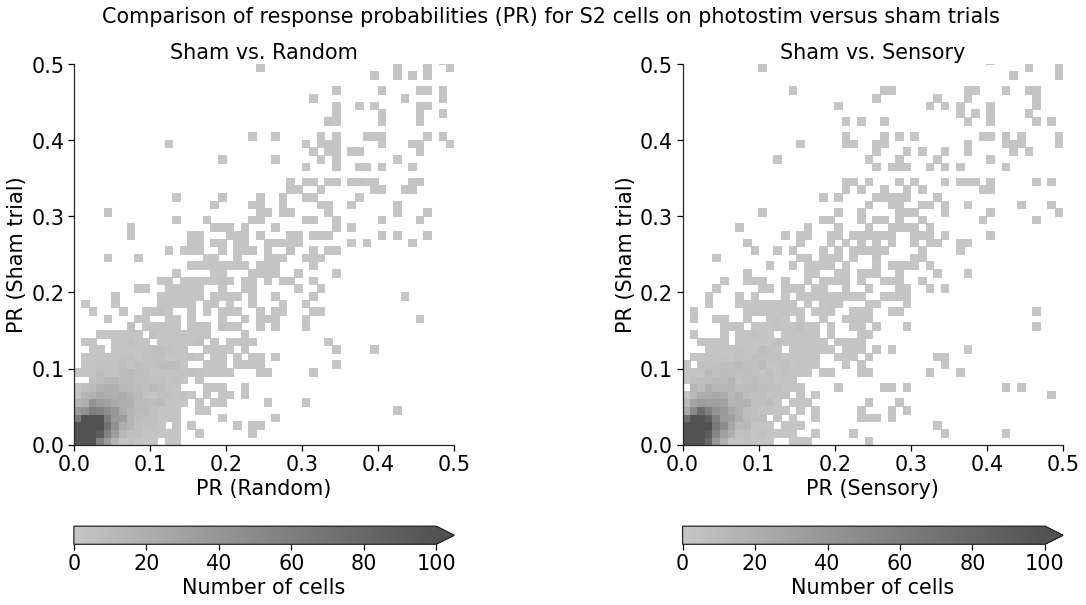

In [216]:
trials = ['pr', 'ps']

fig, axes = plt.subplots(ncols=2, figsize=(20,10))

n_numbers = []

for i, (trial, ax, label) in enumerate(zip(trials, axes, plot_labels)):
    df = cell_df.query('~' + trial + '_target & s2_cell')
    
    sns.histplot(x='prob_response_'+trial, y='prob_response_spont',
                 data=df, ax=ax, binwidth=(0.01,0.01), cbar=True, 
                 cbar_kws={'shrink':.75, 'label': 'Number of cells', 'orientation':'horizontal', 'extend':'max'}, 
                 vmin=0, vmax=100, color='k')
    ax.set_aspect('equal')
    ax.axis([0,0.5,0,0.5]);
    
    ax.set_xlabel(f'PR ({label})')
    ax.set_ylabel('PR (Sham trial)')
    ax.set_title(f'Sham vs. {label}')
    
    n_numbers.append(f'n = {len(df.index.unique())} non-target s2 cells for {trial}')

plt.suptitle('Comparison of response probabilities (PR) for S2 cells on photostim versus sham trials', 
             y=0.96, fontsize='xx-large');

print('N_numbers:', *n_numbers, sep='\n')

# save the figure
save_path = os.path.join(qnap_path, session_type + 
                         '_ResponseProb_S2Cell_PhotostimSham')
ia.savePlot(save_path)

# Whisker response vs. photostimulation response

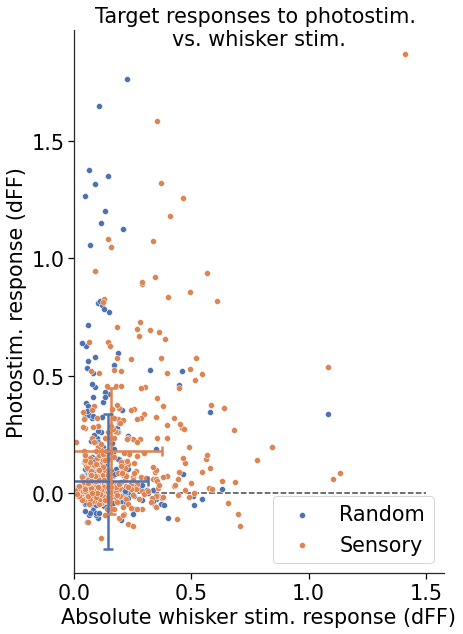

In [247]:
# Scatterplot
# S2 cells only
# Whisker sta resp
# Photostim sta resp

trials = ['pr', 'ps']

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10,10))

for label, trial in zip(plot_labels, trials):
    target_df = cell_df.query(trial + '_target & sta_sig_whisker')
    
    sns.scatterplot(y=target_df[trial + '_sta_amp_resp'], 
                    x=np.absolute(target_df['whisker_sta_amp_resp']), ax=axes, label=label)
    
    photostim_mean_df = target_df[trial + '_sta_amp_resp'].mean()
    photostim_std_df = target_df[trial + '_sta_amp_resp'].std()
    whisker_mean_df = target_df['whisker_sta_amp_resp'].mean()
    whisker_std_df = target_df['whisker_sta_amp_resp'].std()
    
    axes.errorbar(photostim_mean_df, whisker_mean_df,
                  yerr=photostim_std_df, xerr=whisker_std_df, elinewidth=2.5,
                  capsize=5, capthick=2.5)
    
    axes.hlines(0, 0, 1.5, linestyle='--', zorder=-1, alpha=0.5, color='k')
    axes.set_aspect('equal')
    axes.set_xlim([0,None])
    
    axes.set_xlabel('Absolute whisker stim. response (dFF)')
    axes.set_ylabel('Photostim. response (dFF)')
    axes.set_title('Target responses to photostim. \nvs. whisker stim.', fontsize='xx-large', y=0.96)

    # save the figure
    save_path = os.path.join(qnap_path, session_type + 
                             '_whisker_vs_photostim_response_targets')
    ia.savePlot(save_path)

# Plot influence

Random, Sham MannwhitneyuResult(statistic=10390578.0, pvalue=0.003970951819211274)
Sensory, Sham MannwhitneyuResult(statistic=10544999.0, pvalue=0.07281707649121502)
Random, Sensory MannwhitneyuResult(statistic=10597843.0, pvalue=0.1480849039824858)


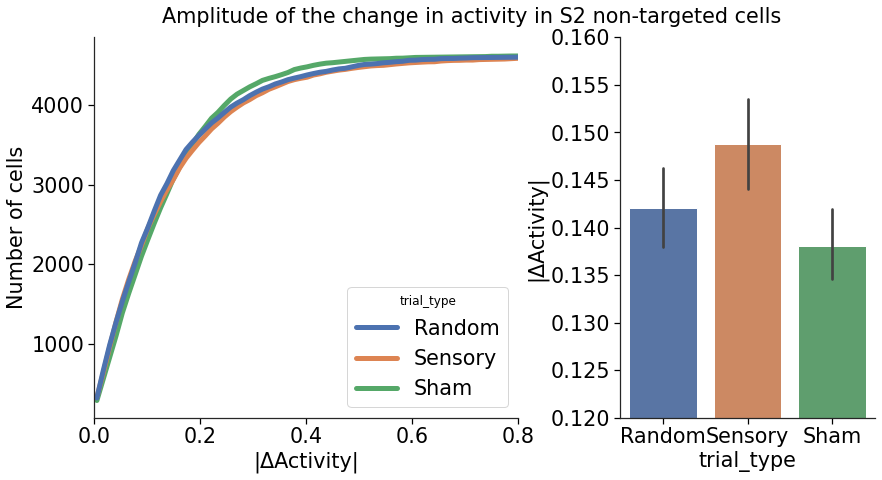

In [281]:
trials = ['pr', 'ps', 'spont']
targets = ['pr', 'ps', 'pr']

df = pd.DataFrame()

for i, (trial, target, label) in enumerate(zip(trials, targets, plot_labels)):
    
    non_target_df = cell_df.query('~' + target + '_target & s2_cell')
    influence = non_target_df[trial + '_avg_norm_influence']
    
    temp_df = pd.DataFrame({'trial_type' : np.repeat(label, len(influence)),
                            'influence' : np.absolute(influence)
                           })
    
    df = pd.concat([df, temp_df])

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(14,7), gridspec_kw={'width_ratios':(5, 3)})

sns.barplot(x='trial_type', y='influence', data=df, ci=95, ax=ax[1]);
ax[1].set_ylabel('|ΔActivity|')
ax[1].set_ylim([0.12, 0.16])

# sns.kdeplot(cumulative=True, hue='trial_type', x='influence', data=df, cut=0, ax=ax[1])
sns.histplot(x='influence', element='poly', hue='trial_type', cumulative=True, fill=False,
             linewidth=5, data=df, ax=ax[0])
ax[0].set_xlabel('|ΔActivity|')
ax[0].set_ylabel('Number of cells')
ax[0].set_xlim(0, 0.8)

plt.suptitle('Absolute change in activity in S2 non-targeted cells', y=0.94, fontsize='xx-large');
plt.subplots_adjust(wspace=0.3)

group1 = df[df['trial_type']==plot_labels[0]]['influence'].to_numpy()
group2 = df[df['trial_type']==plot_labels[1]]['influence'].to_numpy()
group3 = df[df['trial_type']==plot_labels[2]]['influence'].to_numpy()

print(f'{plot_labels[0]}, {plot_labels[2]}', stats.mannwhitneyu(group1, group3))
print(f'{plot_labels[1]}, {plot_labels[2]}', stats.mannwhitneyu(group2, group3))
print(f'{plot_labels[0]}, {plot_labels[1]}', stats.mannwhitneyu(group1, group2))

# save the figure
save_path = os.path.join(qnap_path, session_type + '_DeltaActivityMagnitude_S2Cells')
ia.savePlot(save_path)

Random, Sham MannwhitneyuResult(statistic=10575461.0, pvalue=0.11151216770893368)
Sensory, Sham MannwhitneyuResult(statistic=9908726.0, pvalue=7.916688696894817e-11)
Random, Sensory MannwhitneyuResult(statistic=10050684.0, pvalue=5.966488055907152e-08)


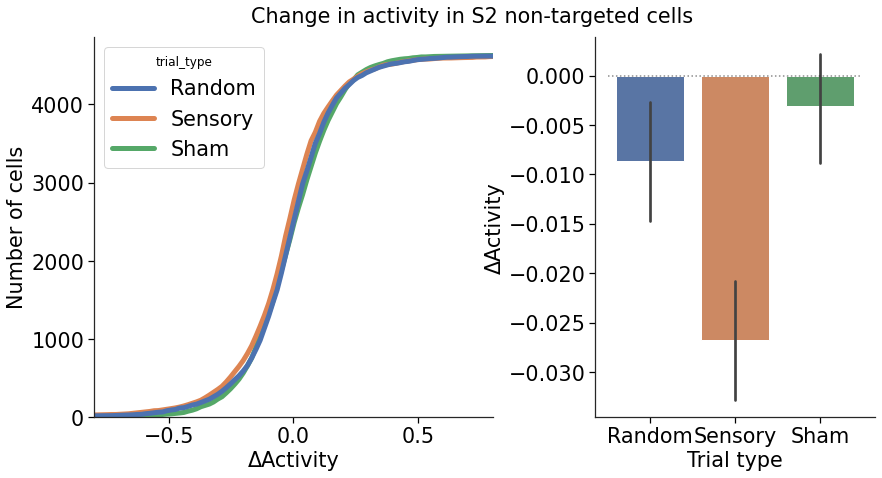

In [282]:
trials = ['pr', 'ps', 'spont']
targets = ['pr', 'ps', 'pr']

df = pd.DataFrame()

for i, (trial, target, label) in enumerate(zip(trials, targets, plot_labels)):
    
    non_target_df = cell_df.query('~' + target + '_target & s2_cell')
    bias = non_target_df[trial + '_avg_norm_influence']
    
    temp_df = pd.DataFrame({'trial_type' : np.repeat(label, len(bias)),
                            'bias' : bias
                           })
    
    df = pd.concat([df, temp_df])

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(14,7), gridspec_kw={'width_ratios':(5,3.5)})

sns.barplot(x='trial_type', y='bias', data=df, ci=95, ax=ax[1]);
ax[1].set_ylabel('ΔActivity')
ax[1].set_xlabel('Trial type')
ax[1].hlines(0, -0.5, 2.5, linestyles='dotted', zorder=4, alpha=0.5, color='k');

# sns.kdeplot(cumulative=True, hue='trial_type', x='bias', data=df, ax=ax[1])
sns.histplot(hue='trial_type', x='bias', cumulative=True, fill=False, linewidth=5,
             element='poly', data=df, ax=ax[0])
ax[0].set_xlim([-0.8, 0.8])
ax[0].set_xlabel('ΔActivity')
ax[0].set_ylabel('Number of cells')

plt.subplots_adjust(wspace=0.3)
plt.suptitle('Change in activity in S2 non-targeted cells', y=0.94, fontsize='xx-large');

group1 = df[df['trial_type']==plot_labels[0]]['bias'].to_numpy()
group2 = df[df['trial_type']==plot_labels[1]]['bias'].to_numpy()
group3 = df[df['trial_type']==plot_labels[2]]['bias'].to_numpy()

print(f'{plot_labels[0]}, {plot_labels[2]}', stats.mannwhitneyu(group1, group3))
print(f'{plot_labels[1]}, {plot_labels[2]}', stats.mannwhitneyu(group2, group3))
print(f'{plot_labels[0]}, {plot_labels[1]}', stats.mannwhitneyu(group1, group2))

# save the figure
save_path = os.path.join(qnap_path, session_type + '_DeltaActivityBias_S2Cells')
ia.savePlot(save_path)

# Find manually annotated CTB targets (only S1 target region was annotated)

In [45]:
pr_experiments = experiment_df.index.str.contains('pr')
tiff_paths = experiment_df[pr_experiments].tiff_path
session_ids = experiment_df[pr_experiments].session_id

ctb_df = pd.DataFrame()

for session_id, tiff_path in zip(session_ids, tiff_paths):

    ctb_annotation = ia.listdirFullpath(tiff_path, 'annotation') 
    ctb_annotation_img = tf.imread(ctb_annotation)
    
    ctb_annotation_coords = np.where(ctb_annotation_img>0)
    ctb_annotation_img[ctb_annotation_coords] = 1 # [y,x] coords
    
    n_annotations = len(ctb_annotation_coords[0])

    cell_img = np.zeros_like(ctb_annotation_img, dtype='uint16')
    
    session_filter = cell_df.session_id.str.contains(session_id)
    session_cell_df = cell_df[session_filter]
    
    cell_id = session_cell_df.index
    cell_x = session_cell_df.cell_x.to_numpy()
    cell_y = session_cell_df.cell_y.to_numpy()
    
    for i, coord in enumerate(zip(cell_y, cell_x)):
        cell_img[coord] = i+1
        
    # binary mask x cell image to get the cells that overlap with target areas
    ctb_cells = cell_img*ctb_annotation_img
    
    ctb_cells = np.unique(ctb_cells)[1:]-1 # correct the cell id due to zero indexing
    
    ctb_id = np.zeros_like(cell_id.to_numpy(), dtype='bool')
    ctb_id[ctb_cells] = True
    
    temp_df = pd.DataFrame(data={'ctb_targets' : ctb_id},
                           index=cell_id)
    
    ctb_df = pd.concat([ctb_df, temp_df])

if 'ctb_targets' in cell_df.columns:
    cell_df['ctb_targets'] = ctb_df
else:
    cell_df.insert(9, 'ctb_targets', ctb_df, allow_duplicates=False)

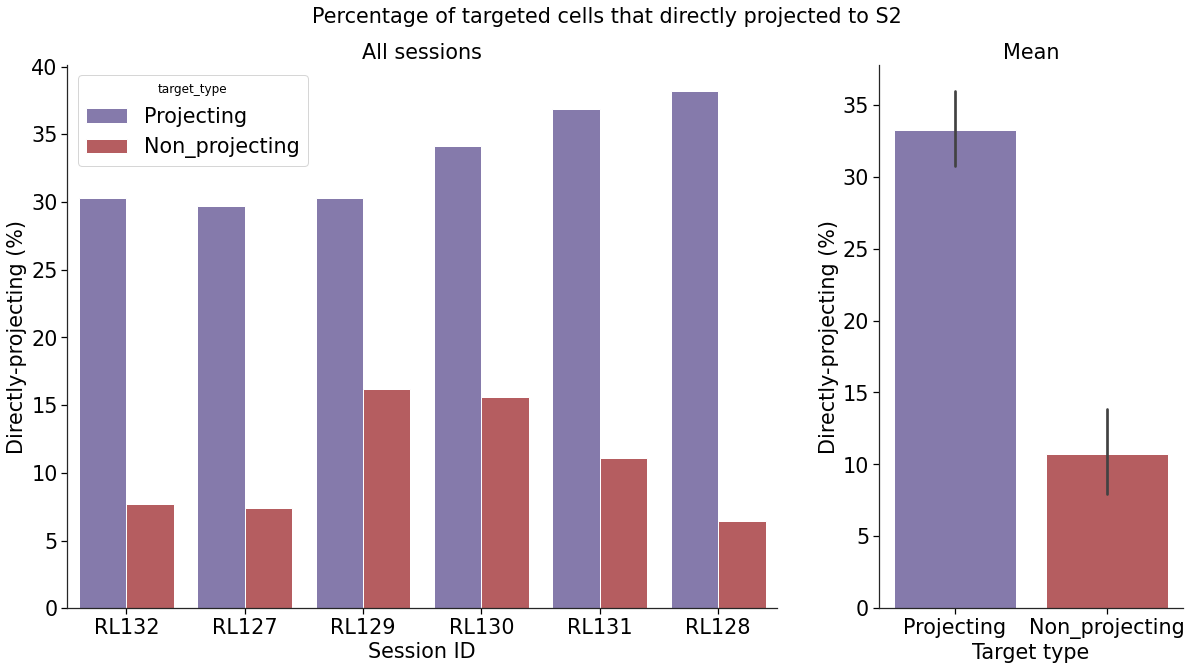

In [46]:
df = pd.DataFrame()

targets = ['Projecting', 'Non_projecting']

new_cell_df = cell_df.rename(columns = {'pr_target': 'Non_projecting', 'ps_target': 'Projecting'})

for target in targets:
    target_df = new_cell_df.query(target)
    
    num_ctb_targets = target_df.groupby('session_id')['ctb_targets'].sum()
    num_targets = target_df.groupby('session_id')[target].count()

    percent_targets_ctb = num_ctb_targets/num_targets * 100
    session_labels = [session_id[-5:] for session_id in target_df['session_id'].unique()]

    temp_df = pd.DataFrame({'target_type' : np.repeat(target, len(percent_targets_ctb)),
                            'percent_ctb' : percent_targets_ctb,
                            'session_id' : session_labels
                           })
    
    df = pd.concat([df, temp_df])
    
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20,10), gridspec_kw={'width_ratios':[7, 3]})

sns.barplot(data=df, x='session_id', y='percent_ctb', hue='target_type', palette={'Projecting':'C4', 'Non_projecting':'C3'}, ax=axes[0]);
sns.barplot(data=df, y='percent_ctb', x='target_type', palette={'Projecting':'C4', 'Non_projecting':'C3'}, ax=axes[1]);

for ax in axes:
    ax.set_ylabel('Directly-projecting (%)');
    
axes[0].set_xlabel('Session ID')
axes[1].set_xlabel('Target type')

axes[0].set_title('All sessions')
axes[1].set_title('Mean')
    
plt.suptitle('Percentage of targeted cells that directly projected to S2', fontsize='xx-large', y=0.96);

# save the figure
save_path = os.path.join(qnap_path, session_type + 
                         '_Pct_TargetCells_DirectProjecting')
ia.savePlot(save_path)

# Find the summed photostim response of CTB+ve and CTB-ve targets in each trial type

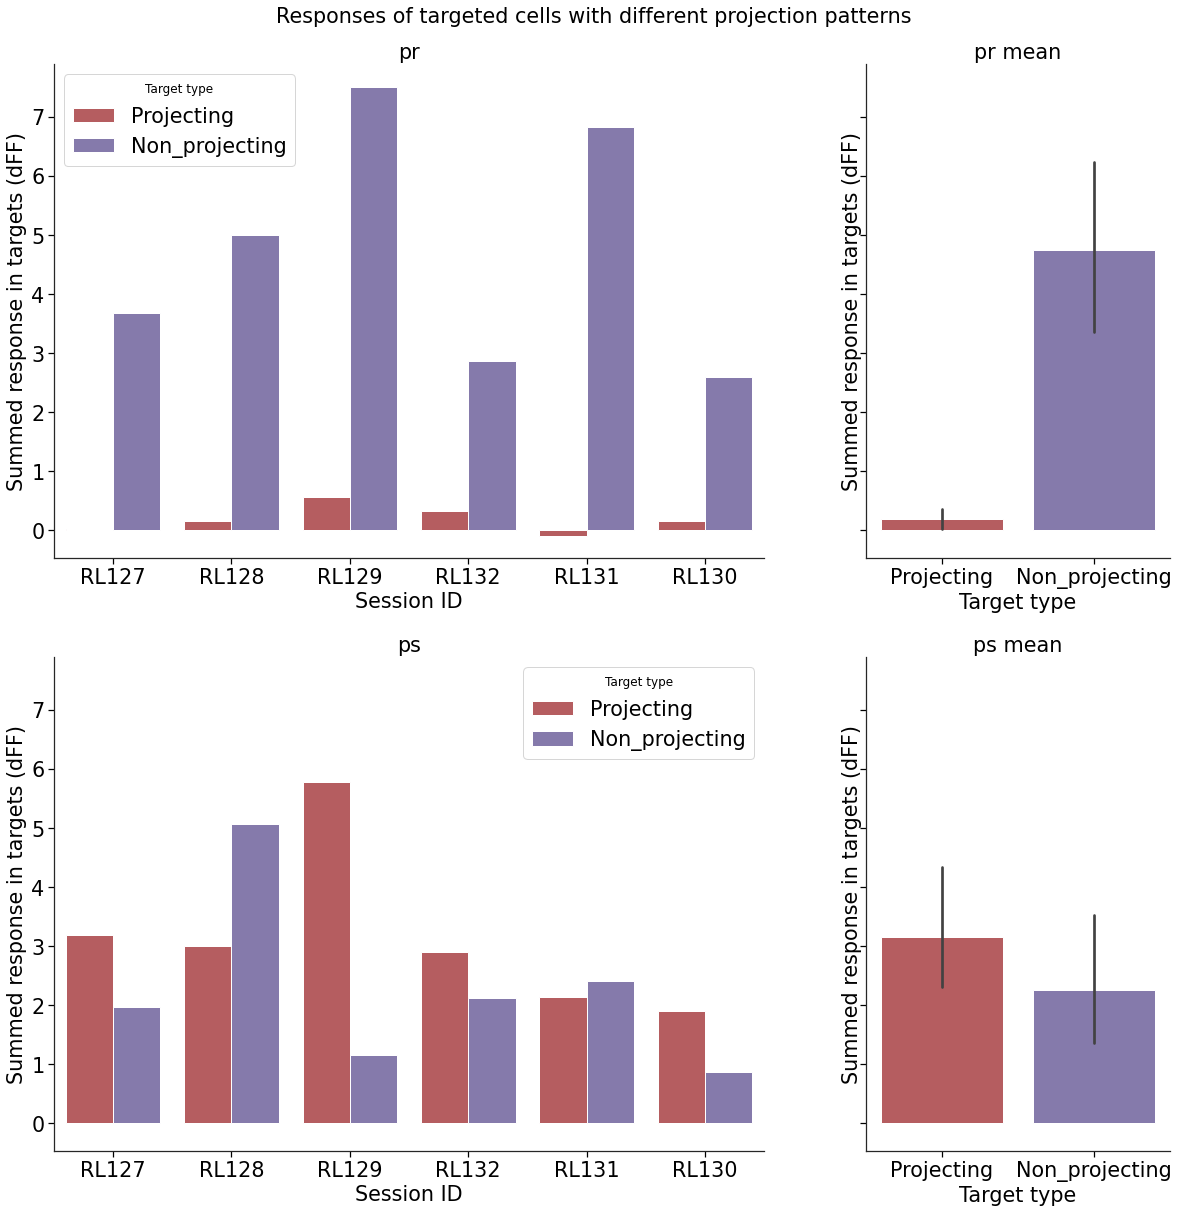

In [47]:
targets = ['Non_projecting', 'Projecting']
trials = ['pr', 'ps']

fig, axes = plt.subplots(nrows=2, ncols=2, sharey=True, figsize=(20,20), gridspec_kw={'width_ratios':[7, 3]})

for i, (target, trial, ax) in enumerate(zip(targets, trials, axes)):
    
    session_labels = []
    
    target_df = new_cell_df.query(target)
    
    ctb_positive_targets = target_df.query('ctb_targets')
    sum_resp_ctb_positive = ctb_positive_targets.groupby('session_id').sum()[trial + '_sta_amp_resp']
    session_labels.extend(ctb_positive_targets.groupby('session_id').sum().index.to_numpy())
    
    ctb_negative_targets = target_df.query('~ctb_targets')
    sum_resp_ctb_negative = ctb_negative_targets.groupby('session_id').sum()[trial + '_sta_amp_resp']
    session_labels.extend(ctb_negative_targets.groupby('session_id').sum().index.to_numpy())
    
#     ctb_positive_filter = cell_mean_timepoint_df.cell_id.isin(ctb_positive_targets)
#     ctb_positive_df = cell_mean_timepoint_df[ctb_positive_filter]
    
#     ctb_negative_filter = cell_mean_timepoint_df.cell_id.isin(ctb_negative_targets)
#     ctb_negative_df = cell_mean_timepoint_df[ctb_negative_filter]
    
    df = pd.DataFrame({'summed_resp' : np.hstack([sum_resp_ctb_positive, sum_resp_ctb_negative]),
                       'Target type' : np.hstack([np.repeat('Projecting', len(sum_resp_ctb_positive)),
                                            np.repeat('Non_projecting', len(sum_resp_ctb_negative))
                                            ]),
                       'session_id' : [session_label[-5:] for session_label in session_labels]
                      })
    
    sns.barplot(data=df, x='session_id', y='summed_resp', hue='Target type', 
                palette=sns.color_palette(['C3', 'C4']), ax=ax[0])
    sns.barplot(data=df, y='summed_resp', x='Target type', 
                palette=sns.color_palette(['C3', 'C4']), ax=ax[1])
    ax[0].set_title(trial)
    ax[0].set_ylabel('Summed response in targets (dFF)')
    ax[0].set_xlabel('Session ID')
    
    ax[1].set_ylabel('Summed response in targets (dFF)')
    ax[1].set_title(trial + ' mean')
    
plt.suptitle('Responses of targeted cells with different projection patterns',
            fontsize='xx-large', y=0.92);

# save the figure
save_path = os.path.join(qnap_path, session_type + 
                         '_ResponseAmplitude_TargetCells_ProjectingS2')
ia.savePlot(save_path)

# Find whisker response of target cells and assess CTB identity vs. whisker response

In [48]:
s2p_paths = session_df['s2p_path'].values
session_ids = session_df.index.values

whisker_responses = pd.Series(dtype='float64')

for s2p_path, session_id in zip(s2p_paths, session_ids):
    
    tiff_folder = os.path.dirname(os.path.dirname(s2p_path))
    file_list = os.listdir(tiff_folder)
    
    for file in file_list:
        if 'whisker_response' in file:
            whisker_dff_img = tf.imread(os.path.join(tiff_folder, file))
        
    session_cell_df = cell_df[cell_df['session_id'] == session_id]
    
    cell_x_list = session_cell_df['cell_x'].values
    cell_y_list = session_cell_df['cell_y'].values
    cell_id_list = session_cell_df.index.values
    
    whisker_response = []
    
    for cell_x, cell_y in zip(cell_x_list, cell_y_list):
        
        whisker_response.append(np.mean(whisker_dff_img[cell_x, cell_y]))
    
    new_rows = pd.Series(data=whisker_response, index=cell_id_list)
    
    whisker_responses = whisker_responses.append(new_rows)
    
cell_df['whisker_sta_amp_resp'] = whisker_responses

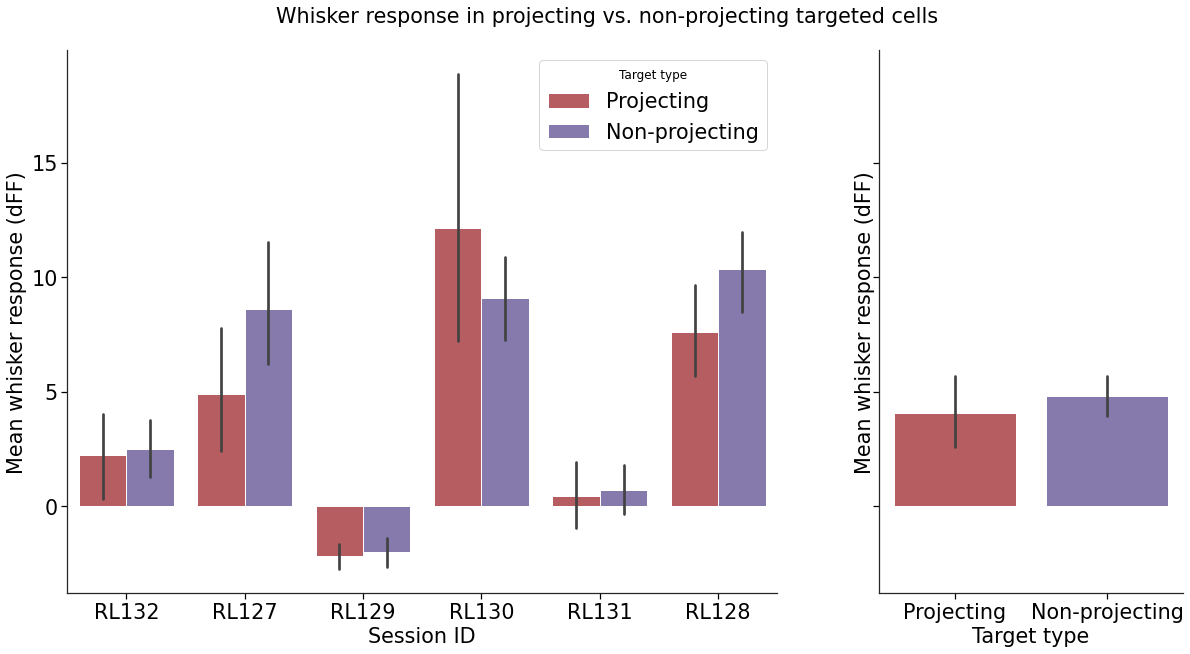

In [49]:
trial = 'whisker'

fig, ax = plt.subplots(nrows=1, ncols=2, sharey=True, figsize=(20,10), gridspec_kw={'width_ratios': (7,3)})

session_labels = []

target_df = cell_df.query('Non_projecting | Projecting')

ctb_positive_targets = target_df.query('ctb_targets')
mean_resp_ctb_positive = ctb_positive_targets[trial + '_sta_amp_resp']
session_labels.extend(ctb_positive_targets.session_id.to_numpy())

ctb_negative_targets = target_df.query('~ctb_targets')
mean_resp_ctb_negative = ctb_negative_targets[trial + '_sta_amp_resp']
session_labels.extend(ctb_negative_targets.session_id.to_numpy())

df = pd.DataFrame({'mean_resp' : np.hstack([mean_resp_ctb_positive, mean_resp_ctb_negative]),
                   'Target type' : np.hstack([np.repeat('Projecting', len(mean_resp_ctb_positive)),
                                               np.repeat('Non-projecting', len(mean_resp_ctb_negative))
                                              ]),
                   'session_id' : [session_label[-5:] for session_label in session_labels]
                  })

sns.barplot(data=df, x='session_id', y='mean_resp', hue='Target type', ci=95,
            palette=sns.color_palette(['C3', 'C4']), ax=ax[0])
sns.barplot(data=df, x='Target type', y='mean_resp', ci=95,
            palette=sns.color_palette(['C3', 'C4']), ax=ax[1])

ax[0].set_ylabel('Mean whisker response (dFF)')
ax[0].set_xlabel('Session ID')

ax[1].set_ylabel('Mean whisker response (dFF)')
ax[1].set_xlabel('Target type')

plt.suptitle('Whisker response in projecting vs. non-projecting targeted cells',
            fontsize='xx-large', y=0.94);

# save the figure
save_path = os.path.join(qnap_path, session_type + 
                         '_ResponseAmplitude_TargetCells_ProjectingS2_WhiskerResponse')
ia.savePlot(save_path)